In [10]:
import csv
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
out_path = '../output/search_all_features_nn_5x1x1_tanh_linear/'

Load all the indivisual files containing the features and score.

In [3]:
all_files = [f for f in listdir(out_path) if isfile(join(out_path, f))]
li = []
for f in all_files:
    df = pd.read_csv(join(out_path, f), index_col=None, header=0)
    li.append(df)

results_nn = pd.concat(li, axis=0, ignore_index=True)

In [4]:
results_nn = results_nn.sort_values(by=['val_score'])
results_nn.head()

,f1,f2,f3,f4,f5,val_score
6838,freq_cross_last_50000,abs_q05,modified_sta_lta5_mean,mean_change_rate_first_10000,q05_roll_std_100,2.319526
27200,abs_q05,classic_sta_lta4_q95,q05_roll_std_10,modified_sta_lta1_q95,q95_roll_mean_10,2.326021
977,max_last_10000,modified_sta_lta2_q05,q05_roll_std_100,abs_q05,modified_sta_lta6_q95,2.327434
3298,abs_q05,q05_roll_std_10,Imin,modified_sta_lta1_q95,av_change_rate_roll_mean_100_v2,2.327987
23879,q05_roll_std_10,modified_sta_lta3_q95,min_roll_std_100,q05_roll_std_100,modified_sta_lta6_q95,2.334773


This table may have repeated structures since the features were chosen at random. For that, we organize the name of the features in lexicographical order, and then we search for duplicates on the concatenation of the name of features.

In [5]:
df = pd.DataFrame(columns=['features', 'val_score']) 
for index, row in results_nn.iterrows():
    sorted_features = [row[i] for i in range(5)]
    sorted_features.sort()
    seperator = '-'
    seperator = seperator.join(sorted_features)
    df = df.append({'features': seperator, 'val_score':row[5]}, ignore_index=True)

In [6]:
df.sort_values(by=['val_score']).head()

,features,val_score
0,abs_q05-freq_cross_last_50000-mean_change_rate...,2.319526
1,abs_q05-classic_sta_lta4_q95-modified_sta_lta1...,2.326021
2,abs_q05-max_last_10000-modified_sta_lta2_q05-m...,2.327434
3,Imin-abs_q05-av_change_rate_roll_mean_100_v2-m...,2.327987
4,min_roll_std_100-modified_sta_lta3_q95-modifie...,2.334773


In [7]:
df_duplicated = df[df.duplicated(['features'])]
print("Duplicate Rows based on a single column are:")
df_duplicated

Duplicate Rows based on a single column are:


,features,val_score
29726,abs_q05-av_change_rate_roll_mean_100-classic_s...,3.189319


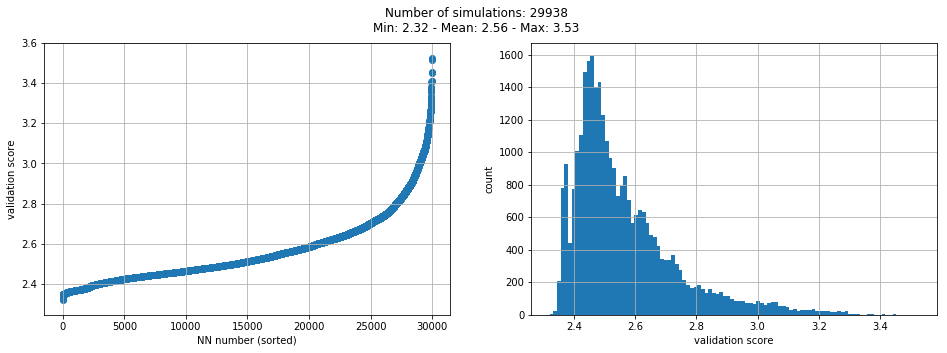

In [8]:
plt.subplots(figsize=(16, 5))
plt.suptitle(f"Number of simulations: {results_nn.shape[0]}\n"
             f"Min: {np.min(results_nn['val_score']):.2f} - "
             f"Mean: {np.mean(results_nn['val_score']):.2f} - "
             f"Max: {np.max(results_nn['val_score']):.2f}")
plt.subplot(1, 2, 1)
plt.scatter(range(results_nn.shape[0]), results_nn.sort_values(by=['val_score'])['val_score'])
plt.grid()
plt.ylabel('validation score')
plt.xlabel('NN number (sorted)')

plt.subplot(1, 2, 2)
plt.hist(results_nn['val_score'].tolist(), bins='auto')  # arguments are passed to np.histogram
plt.grid()
plt.ylabel('count')
plt.xlabel('validation score')

plt.show()

In [14]:
tiny_nn_results_file = 'small_nn_search.csv'
results_nn.to_csv(path_or_buf=tiny_nn_results_file, index=False)